# 2020 Senate Election Odds

This notebook uses the implied state-by-state election odds from PredictIt.org and performs MonteCarlo simulations of US Senate results. The worksheet should be re-run to get the latest estimate.

## Imports

In [1]:
#!pip install pandas matplotlib

In [2]:
import requests
import time
import urllib.request
import json
from random import randint, random
import re
from matplotlib import pyplot as plt
import pandas as pd

## Store state electoral college votes

In [3]:


states = {
    'AL': { 'state':'Alabama', 'abbrev': 'AL', 'url': 6183, },
    'AK': { 'state':'Alaska', 'abbrev': 'AK', 'url': 6688, },
    'AZ': { 'state':'Arizona', 'abbrev': 'AZ', 'url': 5809, },
    'AR': { 'state':'Arkansas', 'abbrev': 'AR', 'url': 6827, }, 
    'CO': { 'state':'Colorado', 'abbrev': 'CO', 'url': 5810, }, 
    'DE': { 'state':'Delaware', 'abbrev': 'DE', 'url': 6808, },
    'GA': { 'state':'Georgia', 'abbrev': 'GA', 'url': 6651, },
    'GA2': { 'state':'Georgia', 'abbrev': 'GA', 'url': 6567, },  # TWO IN GA
    'ID': { 'state':'Idaho', 'abbrev': 'ID', 'url': 6810, },
    'IL': { 'state':'Illinois', 'abbrev': 'IL', 'url': 6830, },
    'IA': { 'state':'Iowa', 'abbrev': 'IA', 'url': 6648, },
    'KS': { 'state':'Kansas', 'abbrev': 'KS', 'url': 5781, },
    'KY': { 'state':'Kentucky', 'abbrev': 'KY', 'url': 6575, },
    'LA': { 'state':'Louisiana', 'abbrev': 'LA', 'url': 6813, },
    'ME': { 'state':'Maine', 'abbrev': 'ME', 'url': 5811, },
    'MA': { 'state':'Massachusetts', 'abbrev': 'MA', 'url': None, 'presumed': 'D', },
    'MI': { 'state':'Michigan', 'abbrev': 'MI', 'url': 6576, },
    'MN': { 'state':'Minnesota', 'abbrev': 'MN', 'url': 6761, },
    'MS': { 'state':'Mississippi', 'abbrev': 'MS', 'url': None, 'presumed': 'R', },
    'MT': { 'state':'Montana', 'abbrev': 'MT', 'url': 6568, },
    'NE': { 'state':'Nebraska', 'abbrev': 'NE', 'url': 6832, },
    'NH': { 'state':'New Hampshire', 'abbrev': 'NH', 'url': 6795, },
    'NJ': { 'state':'New Jersey', 'abbrev': 'NJ', 'url': 6801, },
    'NM': { 'state':'New Mexico', 'abbrev': 'NM', 'url': 6752, },
    'NC': { 'state':'North Carolina', 'abbrev': 'NC', 'url': 5808, },
    'OK': { 'state':'Oklahoma', 'abbrev': 'OK', 'url': None,  'presumed': 'R',},
    'OR': { 'state':'Oregon', 'abbrev': 'OR', 'url': 6786, },
    'RI': { 'state':'Rhode Island', 'abbrev': 'RI', 'url': None, 'presumed': 'D', },
    'SC': { 'state':'South Carolina', 'abbrev': 'SC', 'url': 6706, },
    'SD': { 'state':'South Dakota', 'abbrev': 'SD', 'url': 6826, },
    'TN': { 'state':'Tennessee', 'abbrev': 'TN', 'url': 6792, },
    'TX': { 'state':'Texas', 'abbrev': 'TX', 'url': 6788, },
    'VA': { 'state':'Virginia', 'abbrev': 'VA', 'url': 6821, },
    'WV': { 'state':'West Virginia', 'abbrev': 'WV', 'url': None,  'presumed': 'R',},
    'WY': { 'state':'Wyoming', 'abbrev': 'WY', 'url': 6797, },
}

## Pull state-by-state odds from PredictIt.org

In [4]:
def get_api_response(url):
    webURL = urllib.request.urlopen(url)
    data = webURL.read()
    encoding = webURL.info().get_content_charset('utf-8')
    return json.loads(data.decode(encoding))

In [5]:
# Urls are in this format: e.g. https://www.predictit.org/api/Market/5781/Contracts

state_abbr = 'AK'

url = 'https://www.predictit.org/api/Market/%d/Contracts' % states[state_abbr]['url']

market = get_api_response(url)

# Test url
#url, market

## Extract prices and match with full state names 

In [9]:
state_prices = []
for abbrev, state in list(states.items())[-7:]:
    
    if state['url'] is not None:
        url = 'https://www.predictit.org/api/Market/%d/Contracts' % state['url']
        market = get_api_response(url)
        price = next(contract for contract in market if contract['contractName'] != 'Republican')['lastClosePrice']
    else:
        price = 0.9 if state['presumed'] == 'D' else 0.1
        
    state_prices.append({ 
        'dem_price': price, 
        'state_abbrev': state['abbrev'], 
        'state': state['state'],
    })
    
    print('Got', abbrev, price)
    time.sleep(2)    

Got SC 0.25
Got SD 0.06
Got TN 0.06
Got TX 0.29
Got VA 0.93
Got WV 0.1
Got WY 0.06


In [19]:
pd.DataFrame(state_prices)

,dem_price,state_abbrev,state
0,0.17,AL,Alabama
1,0.27,AK,Alaska
2,0.85,AZ,Arizona
3,0.04,AR,Arkansas
4,0.87,CO,Colorado
5,0.96,DE,Delaware
6,0.38,GA,Georgia
7,0.36,GA,Georgia
8,0.05,ID,Idaho
9,0.93,IL,Illinois


## Define a simulation of one Senate election outcome

In [20]:
def generate_dem_election(log=False):
    # 33 dem + 2 dem caucusing independent seats not up for election 
    dem_votes_tot = 35 
    
    for state in state_prices:
        won = random() < state['dem_price']
        dem_votes = 1 if won else 0
        dem_votes_tot += dem_votes
        
        if log:
            print(dem_votes, 'in', state)
    
    return dem_votes_tot     

In [ ]:
# Test election
# generate_dem_election(True)

## Run many simulated elections

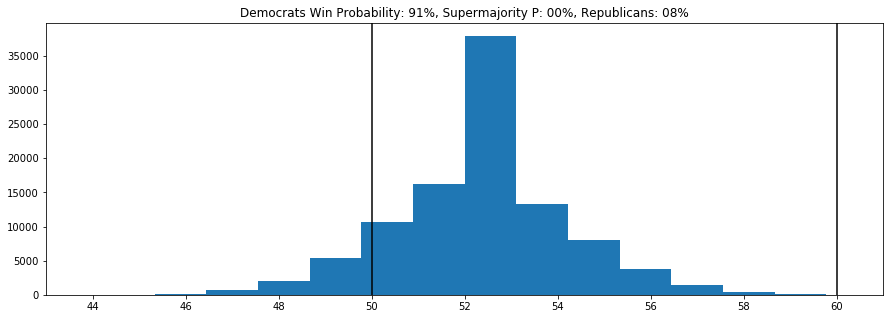

Democrats Win Probability: 91.76100000000001%, Supermajority P: 0.026%, Republicans: 8.238999999999997%


In [21]:
n_elections = 100000

election_set = [generate_dem_election() for n in range(n_elections)]
wins = len([el for el in election_set if el >= 50]) # Assuming 50-50 and Biden -> Dems gain majority
dem_p = wins / len(election_set)
rep_p = 1 - dem_p

supermajority = len([el for el in election_set if el >= 60]) 
dem_super_p = supermajority / len(election_set)

plt.figure(figsize=(15,5))
plt.xlim((43,61))
plt.hist(election_set, bins=18)
plt.axvline(x=50, c='black')
plt.axvline(x=60, c='black')
plt.title('Democrats Win Probability: %.2d%%, Supermajority P: %.2d%%, Republicans: %.2d%%' % (dem_p*100, dem_super_p * 100, rep_p*100))
plt.show()

print('Democrats Win Probability: %s%%, Supermajority P: %s%%, Republicans: %s%%' % (dem_p*100, dem_super_p * 100, rep_p*100))